In [ ]:
# PROBLEM:This is for an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
#The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

#We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

#Avg. Session Length: Average session of in-store style advice sessions.
#Time on App: Average time spent on App in minutes
#Time on Website: Average time spent on Website in minutes
#Length of Membership: How many years the customer has been a member.

In [ ]:
#The workflow for the entire project goes as follows;

#Reading the data
#Doing some exploratory analysis
#Training and testing the data
#Training the model and predicting the test data
#Evaluating the model and finally coming to a conclusion

In [1]:
#We first import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Now we read in the Ecommerce Customers csv file as a DataFrame called customers and check the head(),info() and describe() methods.
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
#Now we do some exploratory data analyis.We create a jointplot to compare the Time on Website and Yearly Amount Spent columns

In [5]:
sns.set_style('whitegrid')

/home/steve/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


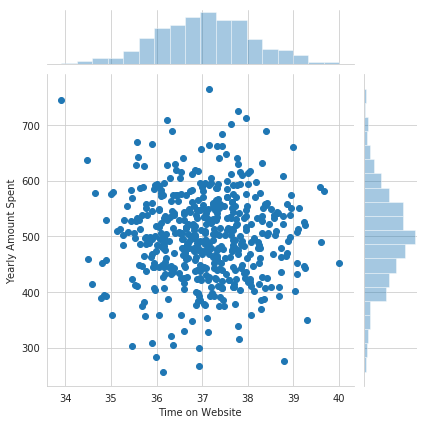

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='scatter')

In [ ]:
#We do the same with time on app vs Yearly amount spent and we see this next plot has much more linear distribution suggesting better correlation.

/home/steve/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


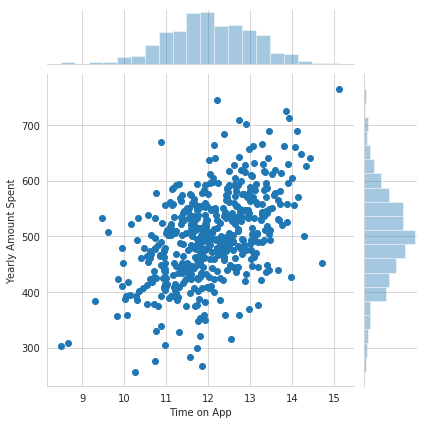

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='scatter')

In [27]:
#Now we draw a pairplot

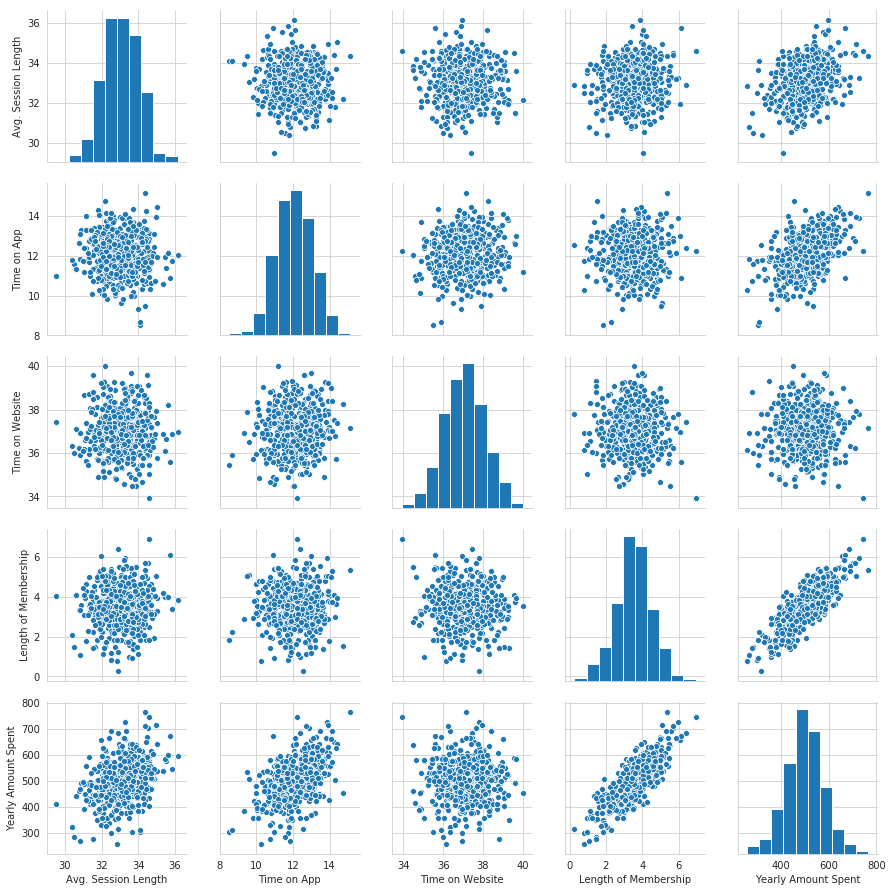

In [9]:
sns.pairplot(customers)

In [ ]:
#Based off this plot what looks to be the most correlated feature with Yearly Amount Spent is the length of membership since it has much more linear distribution compared to the others.
#We create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

/home/steve/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


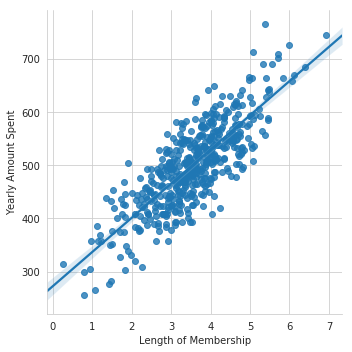

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [ ]:
#Now we split the data into training and testing sets.We set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Now its time to train our model on our training data

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#The coefficients of the model are as below

In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [ ]:
#Now that we have fit our model, let's evaluate its performance by predicting off the test values

In [21]:
predictions = lm.predict( X_test)

In [ ]:
#We create a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Y Predicted')

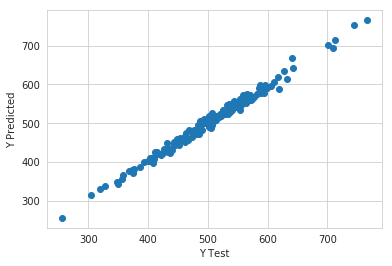

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [ ]:
#Now we evaluate our model performance by calculating the residual sum of squares and the explained variance score 

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [24]:
metrics.explained_variance_score(y_test,predictions) #This result means our model is pretty good.Closer is the value to 1,the better the model.

0.9890771231889606

In [ ]:
#Now we plot a histogram of the residuals to make sure it is normally distributed.

/home/steve/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


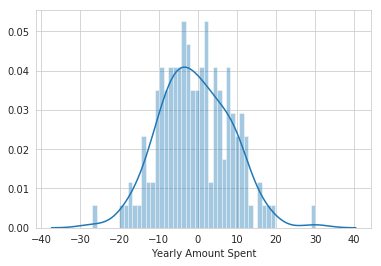

In [25]:
sns.distplot((y_test-predictions),bins = 50)

In [ ]:
#Now to get to the conclusions we need to interpret the coefficients,for that we recreate the data frame as shown below

In [26]:
cf = pd.DataFrame(lm.coef_,X.columns)
cf.columns = ['Coeffecient']
cf

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
#interpreting the coefficients:

#Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
#Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
#Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
#Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.


In [ ]:
# ON A CONCLUDING NOTE WE CAN SAY THAT THE FACTOR WHICH IS MOST DETRIMENTAL IS THE LENGTH OF MEMBERSHIP.AND COMPARED TO THE WEBSITE,THE APP IS DOING A BETTER JOB.EITHER THE COMPANY CAN DEVELOP THEIR WEBSITE AS TO CATCHUP WITH THE PERFORMANCE OF THE APP OR LAY MORE FOCUS ON THE APP SINCE IT IS ALREADY DOING GOOD.